Importing required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/Fake News Data/train1.tsv", delimiter='\t')
valid_data = pd.read_csv("/content/drive/MyDrive/Fake News Data/validation.tsv", delimiter='\t')
test_data = pd.read_csv("/content/drive/MyDrive/Fake News Data/test1.tsv", delimiter='\t')

Viewing and Visualizing data

In [4]:
print(train_data.head(10))

   Unnamed: 0                                              title  \
0        2619  Ex-CIA head says Trump remarks on Russia inter...   
1       16043  YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...   
2         876  Federal Reserve governor Powell's policy views...   
3       19963  SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...   
4       10783  NANCY PELOSI ARROGANTLY DISMISSES Questions on...   
5       18522  EU's Tusk appealed to Rajoy to avoid escalatio...   
6         270  Country Guitarist Who Survived Vegas Shooting ...   
7        7628  Clinton says 'there is no case here' in FBI em...   
8        9599  ABC NEWS REPORTS: Las Vegas Massacre Suspect’s...   
9       11234  BONKERS BERNIE SANDERS: Prioritizing Jobs Over...   

                                                text          subject  \
0  Former CIA director John Brennan on Friday cri...     politicsNews   
1  How did this man come to OWN this store? There...  Government News   
2  President Donald Trump on Thu

In [5]:
print(test_data.head(10))

   Unnamed: 0                                              title  \
0        8104  Conservatives Will HATE What Donald Trump Just...   
1        7467  Trump victory may create new tension between U...   
2        9473  WATCH: Hundreds of ILLEGAL ALIENS Storm Senate...   
3         276  Democratic Senator Franken to resign: CNN, cit...   
4       19274  GANG OF DOMESTIC TERRORISTS Violently Attack L...   
5        3115  Democrats link U.S. debt limit vote to Republi...   
6       10972  STEPHEN COLBERT’S RESPONSE To His Vulgar Remar...   
7        6919  Civil Rights Legend Switches Endorsement And P...   
8       11399  HEY RACHEL MADDOW…While You’re On The Subject ...   
9        8856  WATCH: Ted Cruz Tells Social Worker He’s Going...   

                                                text       subject  \
0  Donald Trump isn t exactly a stranger to makin...          News   
1  Donald Trump’s U.S. election victory may creat...  politicsNews   
2  A couple of quick questions come to mi

In [6]:
print(valid_data.head(10))

   Unnamed: 0                                              title  \
0       14074  TRUMP HATER GEORGE RAMOS Promotes Movie Showin...   
1       17592  Germany seeks to maintain unity if U.S. decert...   
2        5694  No sign U.S. wants to cancel nuclear deal with...   
3       20036  Brazil prosecutors seek to extend Batista dete...   
4         234  Trump Just Asked The Most Unqualified Person E...   
5        5645  Anti-Abortion Laws Collapse In Major Defeat Fo...   
6        6123  Glad to see Obama go, Gulf Arabs expect Trump ...   
7       12208  Explainer: What can possibly go wrong? Nine Br...   
8       12954  Qatar calls Trump's Jerusalem move 'death sent...   
9       14720  Serial Plagiarist Does Victory Dance Over Whit...   

                                                text       subject  \
0  Mexico has been the beneficiary of our open bo...      politics   
1  The German government on Friday vowed to work ...     worldnews   
2  German Foreign Minister Sigmar Gabriel

In [63]:
print(train_data.text[11])

U.S. President-elect Donald Trump is a clever man and will quickly understand his new responsibilities, Russian President Vladimir Putin said in an interview with NTV TV. Putin has spoken previously of his hope that Trump will help restore U.S.-Russia relations, and analysts said he was unlikely to want to dial up anti-Western rhetoric before Trump’s inauguration in January. “Trump was an entrepreneur and a businessman. He is already a statesman, he is the head of the United States of America, one of the world’s leading countries,” NTV quoted Putin as saying in the interview on www.ntv.ru on Sunday. “Because he achieved success in business, it suggests that he is a clever man. And if (he is) a clever man, then he will fully and quite quickly understand another level of responsibility. We assume that he will be acting from these positions,” Putin said. Putin’s comments appeared to address criticism from Trump’s opponents who say his unconventional actions since the election - including 

In [7]:
print("Columns in Dataset:", train_data.columns.tolist())

Columns in Dataset: ['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label']


In [8]:
print("Training Data Info:")
print(train_data.info())

print("\nClass Distribution:")
print(train_data['label'].value_counts())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   title       30000 non-null  object
 2   text        30000 non-null  object
 3   subject     30000 non-null  object
 4   date        30000 non-null  object
 5   label       30000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.4+ MB
None

Class Distribution:
label
0    15478
1    14522
Name: count, dtype: int64


In [9]:
print("Training Data Shape:", train_data.shape)
print("Validation Data Shape:", valid_data.shape)
print("Test Data Shape:", test_data.shape)


Training Data Shape: (30000, 6)
Validation Data Shape: (6000, 6)
Test Data Shape: (8267, 6)


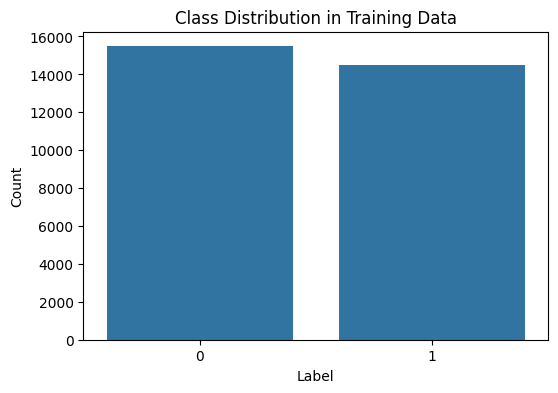

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x=train_data['label'])
plt.title("Class Distribution in Training Data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [11]:
print("\nMissing Values:")
print(train_data.isnull().sum())


Missing Values:
Unnamed: 0    0
title         0
text          0
subject       0
date          0
label         0
dtype: int64


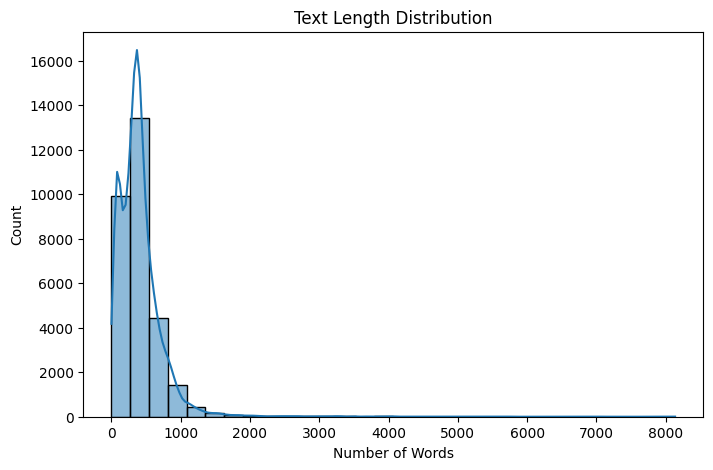

In [12]:
train_data['text_length'] = train_data['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 5))
sns.histplot(train_data['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.show()

In [13]:
text = " ".join(train_data['text'].astype(str))

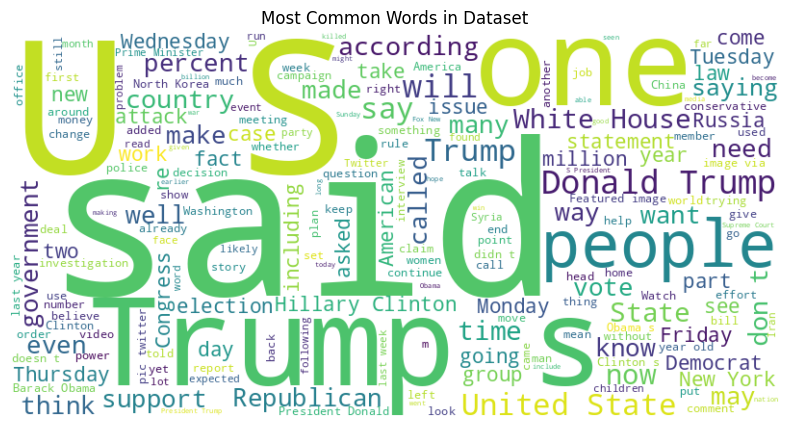

In [14]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Dataset")
plt.show()

In [15]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words = text.split()
filtered_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
common_words = Counter(filtered_words).most_common(20)
print("\nMost Common Words:")
print(common_words)


Most Common Words:
[('Trump', 68335), ('said', 62993), ('would', 36661), ('U.S.', 31300), ('people', 22290), ('President', 21673), ('also', 20507), ('one', 19867), ('Donald', 18203), ('said.', 17686), ('could', 15860), ('told', 15692), ('Republican', 15527), ('United', 15315), ('Clinton', 14726), ('government', 14484), ('Obama', 14318), ('House', 14217), ('like', 13778), ('last', 12380)]


<ipython-input-17-b4961d303674>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Word", data=common_words_df, palette="Blues_r")


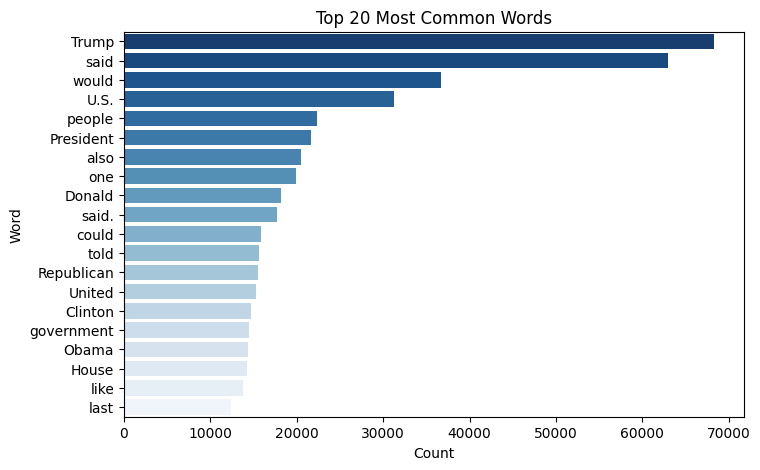

In [17]:
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

plt.figure(figsize=(8, 5))
sns.barplot(x="Count", y="Word", data=common_words_df, palette="Blues_r")
plt.title("Top 20 Most Common Words")
plt.show()

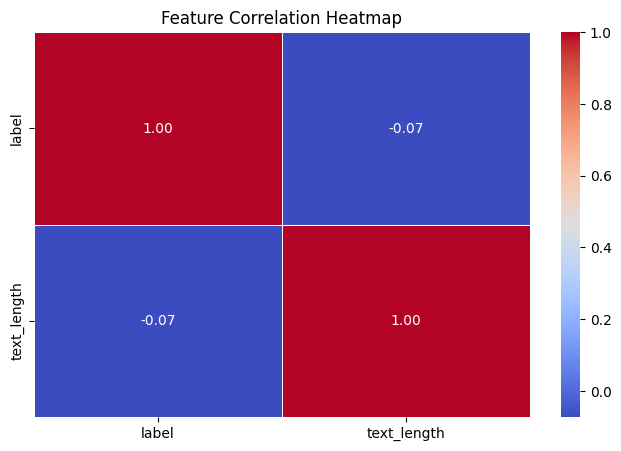

In [18]:
train_data = train_data.loc[:, ~train_data.columns.str.contains('Unnamed')]

numeric_columns = train_data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Tokenizing for BERT

In [19]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [20]:
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

Preparing datasets for BERT

In [21]:

X_train, X_val, y_train, y_val = train_test_split(train_data['text'], train_data['label'], test_size=0.2, random_state=42)
train_dataset = TextDataset(X_train.tolist(), y_train.tolist(), tokenizer)
val_dataset = TextDataset(X_val.tolist(), y_val.tolist(), tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [22]:
num_labels = len(train_data['label'].unique())
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

Training setup for BERT

In [23]:

optimizer = AdamW(bert_model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

BERT training Function

In [24]:

def train_bert(model, train_loader, val_loader, optimizer, criterion, epochs=3):
    model.train()
    train_losses, train_accuracies = [], []

    for epoch in range(epochs):
        total_loss, total_correct = 0, 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            loss = criterion(outputs.logits, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_correct += (outputs.logits.argmax(dim=1) == labels).sum().item()

        avg_loss = total_loss / len(train_loader)
        avg_accuracy = total_correct / len(train_dataset)

        train_losses.append(avg_loss)
        train_accuracies.append(avg_accuracy)
        print(f"Epoch {epoch+1}, Loss: {avg_loss}, Accuracy: {avg_accuracy}")

    return train_losses, train_accuracies

bert_losses, bert_accuracies = train_bert(bert_model, train_loader, val_loader, optimizer, criterion, epochs=3)


Epoch 1, Loss: 0.0408320876256718, Accuracy: 0.9873333333333333
Epoch 2, Loss: 0.011060358510847437, Accuracy: 0.9967916666666666
Epoch 3, Loss: 0.005918361572810681, Accuracy: 0.9980833333333333


Saving the model for reusability

In [26]:
torch.save(bert_model.state_dict(), "bert_model.pth")

In [27]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 107.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import spacy

In [29]:
nlp = spacy.load("en_core_web_sm")

Tokenizing for BiLSTM using external tokenizer (spacy)

In [30]:
def spacy_tokenizer(text):
    return [token.text for token in nlp(text.lower())]

In [31]:
class BiLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, dropout=0.3):
        super(BiLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        lstm_out = self.dropout(lstm_out[:, -1, :])
        output = self.fc(lstm_out)
        return output

In [32]:
class FakeNewsDataset(Dataset):
    def __init__(self, file_path, vocab_size=5000, seq_length=50):
        import pandas as pd
        from collections import Counter

        df = pd.read_csv(file_path, delimiter='\t')
        self.texts = df['text'].astype(str).tolist()
        self.labels = df['label'].values

        self.tokenized_texts = [spacy_tokenizer(text) for text in self.texts]
        all_words = [word for sentence in self.tokenized_texts for word in sentence]
        most_common_words = [word for word, _ in Counter(all_words).most_common(vocab_size - 2)]
        self.word2idx = {word: idx + 2 for idx, word in enumerate(most_common_words)}
        self.word2idx["<PAD>"] = 0
        self.word2idx["<UNK>"] = 1

        self.data = [self.text_to_sequence(text, seq_length) for text in self.tokenized_texts]
        self.data = torch.tensor(self.data, dtype=torch.long)
        self.labels = torch.tensor(self.labels, dtype=torch.long)

    def text_to_sequence(self, text, seq_length):
        sequence = [self.word2idx.get(word, self.word2idx["<UNK>"]) for word in text]
        if len(sequence) < seq_length:
            sequence += [self.word2idx["<PAD>"]] * (seq_length - len(sequence))
        else:
            sequence = sequence[:seq_length]
        return sequence

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

Training setup for BiLSTM

In [33]:
vocab_size = 5000
embedding_dim = 100
hidden_dim = 128
output_dim = 2
batch_size = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [34]:
dataset = FakeNewsDataset("/content/drive/MyDrive/Fake News Data/train1.tsv")
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [35]:
lstm_model = BiLSTM(vocab_size, embedding_dim, hidden_dim, output_dim).to(device)
optimizer = optim.Adam(lstm_model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

Training the model

In [37]:
def train_lstm(model, train_loader, optimizer, criterion, epochs=5):
    model.train()
    train_losses, train_accuracies = [], []

    for epoch in range(epochs):
        total_loss, total_correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_correct += (outputs.argmax(dim=1) == labels).sum().item()

        avg_loss = total_loss / len(train_loader)
        avg_accuracy = total_correct / len(dataset)

        train_losses.append(avg_loss)
        train_accuracies.append(avg_accuracy)
        print(f"Epoch {epoch+1}, Loss: {avg_loss}, Accuracy: {avg_accuracy}")

    return train_losses, train_accuracies

lstm_losses, lstm_accuracies = train_lstm(lstm_model, train_loader, optimizer, criterion, epochs=5)


Epoch 1, Loss: 0.01142539736787927, Accuracy: 0.9967
Epoch 2, Loss: 0.0095852213045625, Accuracy: 0.9971
Epoch 3, Loss: 0.00792716062785981, Accuracy: 0.9975666666666667
Epoch 4, Loss: 0.005070383419803036, Accuracy: 0.9983333333333333
Epoch 5, Loss: 0.0034142684029757607, Accuracy: 0.9989333333333333


In [38]:
torch.save(lstm_model.state_dict(), "bilstm_model.pth")
print("Model saved successfully!")

Model saved successfully!


Comparing the models

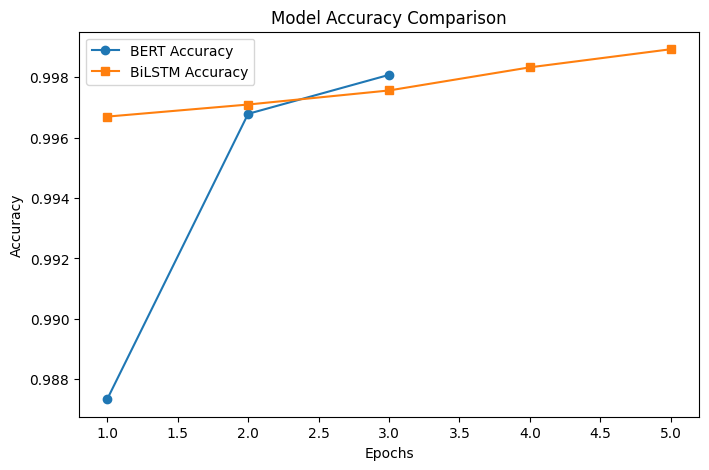

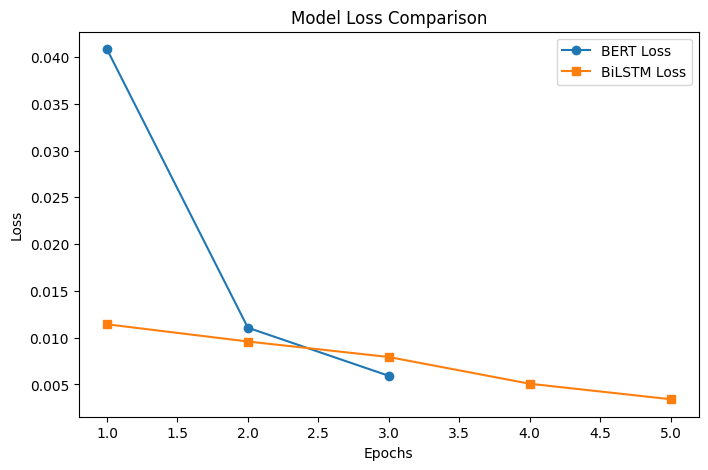

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(bert_accuracies) + 1), bert_accuracies, label="BERT Accuracy", marker='o')
plt.plot(range(1, len(lstm_accuracies) + 1), lstm_accuracies, label="BiLSTM Accuracy", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(bert_losses) + 1), bert_losses, label="BERT Loss", marker='o')
plt.plot(range(1, len(lstm_losses) + 1), lstm_losses, label="BiLSTM Loss", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Comparison")
plt.legend()
plt.show()


In [40]:
from torch.utils.data import DataLoader, TensorDataset
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


In [42]:
train_data = pd.read_csv("/content/drive/MyDrive/Fake News Data/train1.tsv", delimiter="\t").drop(columns=["Unnamed: 0"])
valid_data = pd.read_csv("/content/drive/MyDrive/Fake News Data/validation.tsv", delimiter="\t").drop(columns=["Unnamed: 0"])
test_data = pd.read_csv("/content/drive/MyDrive/Fake News Data/test1.tsv", delimiter="\t").drop(columns=["Unnamed: 0"])


In [41]:
print(train_data.columns.tolist())
print(valid_data.columns.tolist())
print(test_data.columns.tolist())


['title', 'text', 'subject', 'date', 'label', 'text_length']
['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label']
['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label']


Defining function to evalutate the models

In [44]:
def evaluate_model(model, test_loader, is_bert=True):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in test_loader:
            if is_bert:
                inputs, labels = batch['input_ids'].to(device), batch['label'].to(device)
                outputs = model(inputs)
                predictions = outputs.logits.argmax(dim=1)
            else:
                inputs, labels = batch
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                predictions = outputs.argmax(dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    return correct / total

In [45]:
test_dataset_bert = TextDataset(test_data['text'].tolist(), test_data['label'].tolist(), tokenizer)
test_loader_bert = DataLoader(test_dataset_bert, batch_size=32, shuffle=False)

In [46]:
bert_test_acc = evaluate_model(bert_model, test_loader_bert, is_bert=True)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


In [47]:
print(f"BERT Test Accuracy: {bert_test_acc:.4f}")

BERT Test Accuracy: 0.9855


In [48]:
test_dataset_lstm = FakeNewsDataset("/content/drive/MyDrive/Fake News Data/test1.tsv")
test_loader_lstm = DataLoader(test_dataset_lstm, batch_size=32, shuffle=False)

In [49]:
lstm_test_acc = evaluate_model(lstm_model, test_loader_lstm, is_bert=False)
print(f"BiLSTM Test Accuracy: {lstm_test_acc:.4f}")

BiLSTM Test Accuracy: 0.7183


Defining function to predict BERT

In [56]:
word2idx = dataset.word2idx
seq_length = 50

def preprocess(text):
    tokens = spacy_tokenizer(text)
    sequence = [word2idx.get(word, word2idx["<UNK>"]) for word in tokens]
    if len(sequence) < seq_length:
        sequence += [word2idx["<PAD>"]] * (seq_length - len(sequence))
    else:
        sequence = sequence[:seq_length]
    return torch.tensor(sequence).unsqueeze(0).to(device)

def predict_bilstm(text):
    model = BiLSTM(vocab_size, embedding_dim, hidden_dim, output_dim)
    model.load_state_dict(torch.load("bilstm_model.pth", map_location=device))
    model.to(device)
    model.eval()

    input_tensor = preprocess(text)
    with torch.no_grad():
        output = model(input_tensor)
        prediction = torch.argmax(output, dim=1).item()
        return ["Fake", "Real"][prediction]



Defining function to predict BiLSTM

In [58]:
def predict_bert(text):
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        padding="max_length",
        return_attention_mask=True,
        return_tensors="pt",
        truncation=True
    )

    input_ids = encoding["input_ids"].to(device)
    attention_mask = encoding["attention_mask"].to(device)

    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
    model.load_state_dict(torch.load("bert_model.pth", map_location=device))
    model.to(device)
    model.eval()

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        prediction = torch.argmax(outputs.logits, dim=1).item()
        return ["Fake", "Real"][prediction]


BERT prediction

In [81]:
predict_bert("During an Oval Office meeting with Salvadoran President Nayib Bukele, President Donald Trump and members of his administration argued they were not required to return deported Salvadoran citizen Kilmar Abrego Garcia to the United States, in spite of the Supreme Court ruling in favor of facilitating his return. President Bukele himself said that he was not authorized to return Mr. Garcia, who was legally present in the U.S. before being deported in March. ")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


'Real'

BiLSTM prediction

In [82]:
predict_bilstm("During an Oval Office meeting with Salvadoran President ragahava, President Donald Trump and members of his administration argued they were not required to return deported african citizen siddharth chadrashekar to the United States, in spite of the Supreme Court ruling in favor of facilitating his return. President pravesh himself said that he was not authorized to return Mr. chadrashekar, who was legally present in the U.S. before being deported in 2022. ")



'Fake'